In [315]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [316]:
#imported libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from PIL import Image

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [317]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [318]:
#resizing image as per reqyirements of resnet
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [319]:
DIR_TRAIN = "./Training/"
DIR_TEST = "./Test"
classes_train = os.listdir(DIR_TRAIN)
classes_test = os.listdir(DIR_TEST)
print(len(classes_test))

25


In [320]:
classes = sorted(classes_train)

In [321]:
trainset = torchvision.datasets.ImageFolder(root='./Training', transform=transform)
testset = torchvision.datasets.ImageFolder(root='./Test', transform=transform)

In [322]:
batch_size = 128
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [323]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels.shape)

torch.Size([128, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([128])


In [324]:
model = models.resnet50(pretrained = True)

In [325]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [326]:
for p in model.parameters():
    p.requires_grad = False

In [327]:
#changed last sequential layer of model
model.fc = nn.Sequential(nn.Linear(2048, 1024),
                           nn.ReLU(),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Linear(512, 131),
                           nn.LogSoftmax(dim=1))

In [328]:
model = model.to(device)

In [329]:
import torch.optim as optim
loss_fn = nn.NLLLoss()
opt = optim.Adam(model.parameters(), lr = 0.001)

In [330]:
def evaluation(dataloader):
    total, correct = 0, 0
    model.eval()
    for data in dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Min loss 4.88
Iteration: 0/391, Loss: 4.88
Min loss 4.32
Min loss 3.46
Min loss 3.05
Min loss 2.76
Min loss 2.74
Min loss 2.31
Min loss 1.97
Min loss 1.70
Min loss 1.46
Min loss 1.19
Min loss 1.03
Min loss 0.91
Min loss 0.81
Min loss 0.63
Min loss 0.51
Min loss 0.38
Min loss 0.32
Min loss 0.26
Min loss 0.26
Min loss 0.21
Min loss 0.16
Min loss 0.16
Min loss 0.13
Min loss 0.12
Min loss 0.11
Min loss 0.08
Min loss 0.08
Min loss 0.07
Min loss 0.04
Min loss 0.04
Min loss 0.03
Min loss 0.02
Min loss 0.02
Min loss 0.02
Epoch: 1/2, Test acc: 97.67, Train acc: 99.86
Iteration: 0/391, Loss: 0.02
Min loss 0.01
Min loss 0.01
Min loss 0.01
Min loss 0.01
Min loss 0.01
Min loss 0.01
Min loss 0.01
Min loss 0.00
Min loss 0.00
Min loss 0.00
Epoch: 2/2, Test acc: 97.47, Train acc: 99.95


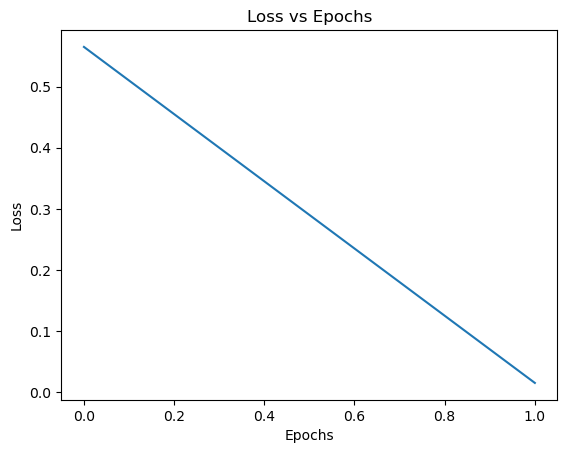

In [331]:
loss_epoch_arr = []
max_epochs = 2
min_loss = 1000
n_iters = np.ceil(50000/batch_size)
for epoch in range(max_epochs):
    epoch_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        model.train()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # Avaliação do modelo dentro do loop de treinamento
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(model.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
        epoch_loss += loss.item()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
    
    avg_epoch_loss = epoch_loss / len(trainloader)
    loss_epoch_arr.append(avg_epoch_loss)
    
    # Avaliação do modelo no final de cada época
    with torch.no_grad():
        model.eval()
        test_acc = evaluation(testloader)
        train_acc = evaluation(trainloader)
        print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
            epoch+1, max_epochs, test_acc, train_acc))

    
# Plotar a curva de perda
plt.plot(loss_epoch_arr)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [332]:
model.load_state_dict(best_model)
print(evaluation(trainloader), evaluation(testloader))

99.96093139553055 98.4331797235023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


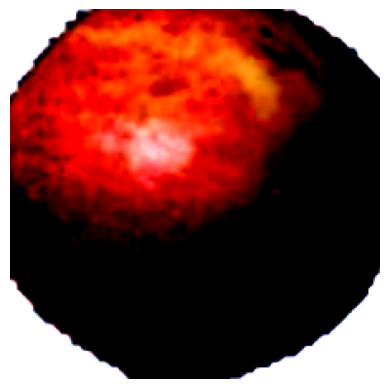

Classe
Maçã vermelha 3
Previsão
Maçã vermelha 3


In [339]:
dataiter = iter(testloader)
images, labels = next(dataiter)
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()
imshow(torchvision.utils.make_grid(images[:1]))
print("Classe")
print(' '.join(classes_train[labels[j]] for j in range(1)))
images = images.to(device)
outputs = model(images)
max_values, pred_class = torch.max(outputs.data, 1)
print("Previsão")
print(' '.join(classes_train[pred_class[j]] for j in range(1)))

In [340]:
# Saving the state dictionary of the best model
torch.save(best_model, 'modelo_frutas.pth')
print("Model saved as best_model.pth")


Model saved as best_model.pth
